In [1]:
from sklearn.datasets import fetch_lfw_people
from torchvision import transforms
import torchvision
from PIL import Image
import os
import numpy as np
import torch
import pickle

In [ ]:
# 변환 정의 (필요에 따라 추가)
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
])

# CIFAR-10 데이터셋 다운로드
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

In [ ]:
import random

# CIFAR-10에서 이미지와 레이블 분리
images, labels = cifar10_dataset.data, cifar10_dataset.targets

# 무작위로 26,000개의 이미지 선택
sample_indices = random.sample(range(len(images)), 26000)
sampled_images = [images[i] for i in sample_indices]
sampled_labels = [labels[i] for i in sample_indices]


In [ ]:
from PIL import Image
import os

# 저장할 디렉토리 생성
save_dir = './cifar10_samples'
os.makedirs(save_dir, exist_ok=True)

# 선택한 이미지 저장
for i, img in enumerate(sampled_images):
    image = Image.fromarray(img)
    image.save(os.path.join(save_dir, f'sample_{i}.png'))

In [4]:
# LFW 데이터 불러오기
lfw_people = fetch_lfw_people(resize=0.5, color=False)
lfw_images = lfw_people.images
lfw_labels = np.ones(len(lfw_images))  # 'face' 레이블 = 1

# CIFAR-10 데이터 불러오기
cifar10_images = []
cifar10_labels = np.zeros(26000)  # 'non-face' 레이블 = 0

cifar10_path = './cifar10_samples/'
for i, img_file in enumerate(os.listdir(cifar10_path)):
    if i >= 26000:
        break
    img = Image.open(os.path.join(cifar10_path, img_file)).convert('L')  # 흑백 변환
    img = img.resize((47, 62))  # 62x47로 크기 변경
    cifar10_images.append(np.array(img))


In [5]:
# 두 데이터셋 합치기
combined_images = np.concatenate((lfw_images, np.array(cifar10_images)), axis=0)
combined_labels = np.concatenate((lfw_labels, cifar10_labels), axis=0)

# 데이터셋 저장
dataset = {
    'images': combined_images,
    'labels': combined_labels
}

with open('combined_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

print("데이터셋 생성 완료")

데이터셋 생성 완료


Label distribution: {0.0: 26000, 1.0: 13233}


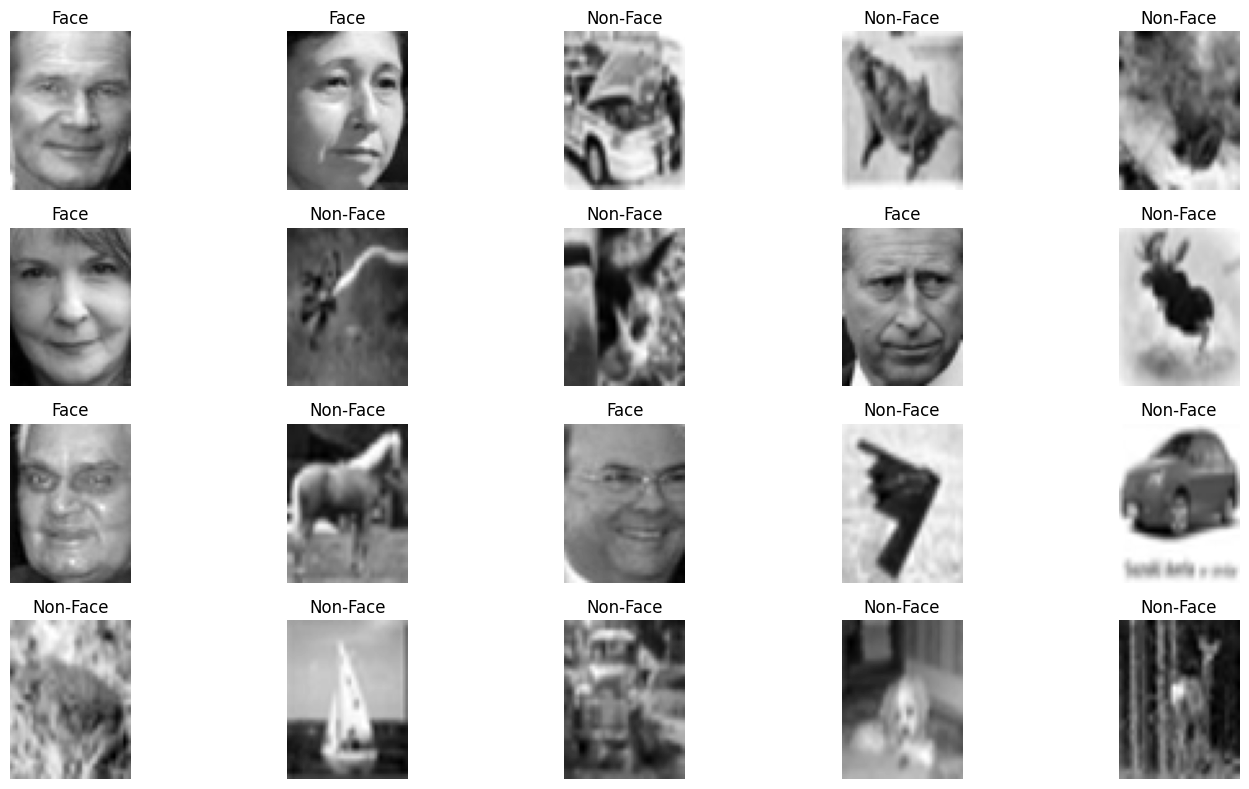

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 데이터셋 로드
with open('combined_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

images = dataset['images']
labels = dataset['labels']

# 데이터셋 확인: 레이블 분포
unique, counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Label distribution:", label_distribution)

# 시각화 함수 정의
def visualize_samples(images, labels, num_samples=20):
    plt.figure(figsize=(15, 8))
    indices = np.random.choice(len(images), size=num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title('Face' if labels[idx] == 1 else 'Non-Face')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 샘플 이미지 시각화
visualize_samples(images, labels)
